# Cancer prediction

## Module imports

In [36]:
import pandas as pd
import numpy as np

# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

## Importing dataset

In [2]:
!unzip /content/cancer_data.csv.zip

Archive:  /content/cancer_data.csv.zip
  inflating: cancer_data.csv         
  inflating: __MACOSX/._cancer_data.csv  


In [3]:
DATASET_PATH = '/content/cancer_data.csv'
df = pd.read_csv(DATASET_PATH)

## Exploratory Data Analysis

In [4]:
df.shape

(683, 11)

In [5]:
## Checking for null values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
## Let's see what are the classes
df['Class'].unique()

array([2, 4])

2 : Non cancerous
4 : Cancerous

We are mapping 2 with 0(non cancerous) and 4 with 1(cancerous)

In [9]:
df['Class'] = df['Class'].map({2:0,4:1})

In [10]:
class_names = ['non-cancerous','cancerous']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


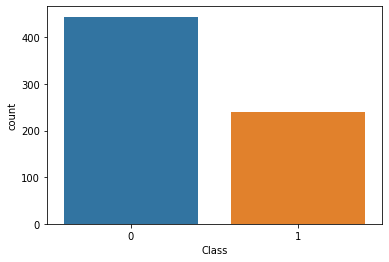

In [11]:
## Total counts of these classes 
sns.countplot(df['Class'])

These is an imbalance dataset

In [12]:
## Dropping the sample code number
df.drop('Sample code number',axis=1,inplace=True)

## Splitting the dataset into Train and test set

In [13]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.2,random_state=42)

In [14]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [15]:
print('Shape of x train : ', x_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (546, 9)
Shape of x test :  (137, 9)
Shape of y train :  (546,)
Shape of y test :  (137,)


## Models

In [16]:
def metrics(y_true,y_pred,f1_scores_list=None):
  print('f1 score :',f1_score(y_true,y_pred))
  print()
  print('accuracy :',accuracy_score(y_true,y_pred))
  print()
  print('Classification Report--')
  print(classification_report(y_true,y_pred,target_names=class_names))
  print()
  print('Confussion matrix--')
  print(confusion_matrix(y_true,y_pred))
  print()
  if f1_scores_list is not None:
    print('Minimum f1 score[TRAINING] :',min(f1_scores_list))
    print('Maximum f1 score[TRAINING] :',max(f1_scores_list))
    print('Average f1 score[TRAINING] :',np.mean(f1_scores_list))



### Naive Bias

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred = nb.predict(x_test)

In [19]:
metrics(y_test,y_pred)

f1 score : 0.9482758620689655

accuracy : 0.9562043795620438

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.96      0.96      0.96        79
    cancerous       0.95      0.95      0.95        58

     accuracy                           0.96       137
    macro avg       0.96      0.96      0.96       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[76  3]
 [ 3 55]]



### Ridge classifier

In [21]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1)
rc.fit(x_train,y_train)

RidgeClassifier(alpha=1)

In [22]:
y_pred = rc.predict(x_test)

In [23]:
metrics(y_test,y_pred)

f1 score : 0.9174311926605505

accuracy : 0.9343065693430657

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.91      0.99      0.95        79
    cancerous       0.98      0.86      0.92        58

     accuracy                           0.93       137
    macro avg       0.94      0.92      0.93       137
 weighted avg       0.94      0.93      0.93       137


Confussion matrix--
[[78  1]
 [ 8 50]]



### Random forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy")
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
y_pred = rfc.predict(x_test)

In [26]:
metrics(y_test,y_pred)

f1 score : 0.9464285714285714

accuracy : 0.9562043795620438

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.94      0.99      0.96        79
    cancerous       0.98      0.91      0.95        58

     accuracy                           0.96       137
    macro avg       0.96      0.95      0.95       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[78  1]
 [ 5 53]]



### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
metrics(y_test,y_pred)

f1 score : 0.9464285714285714

accuracy : 0.9562043795620438

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.94      0.99      0.96        79
    cancerous       0.98      0.91      0.95        58

     accuracy                           0.96       137
    macro avg       0.96      0.95      0.95       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[78  1]
 [ 5 53]]



### k nearest neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = neigh.predict(x_test)

In [32]:
metrics(y_test,y_pred)

f1 score : 0.9369369369369369

accuracy : 0.948905109489051

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.93      0.99      0.96        79
    cancerous       0.98      0.90      0.94        58

     accuracy                           0.95       137
    macro avg       0.95      0.94      0.95       137
 weighted avg       0.95      0.95      0.95       137


Confussion matrix--
[[78  1]
 [ 6 52]]



### Feed-forward-neural-network

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [34]:
tf.random.set_seed(200)

#model

fnn = tf.keras.Sequential()

## adding layers

fnn.add(tf.keras.layers.Dense(4,activation='relu'))
fnn.add(tf.keras.layers.Dense(2,activation='relu'))
fnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
             
#compile
fnn.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics =['accuracy'])
             
#fitting data
history = fnn.fit(x_train,
            y_train,
            validation_data=(x_test,y_test),
            epochs=50)


Epoch 1/50
18/18 [==============================] - 1s 30ms/step - loss: 0.6661 - accuracy: 0.7308 - val_loss: 0.6484 - val_accuracy: 0.7007
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.6941 - val_loss: 0.6238 - val_accuracy: 0.7007
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6978 - val_loss: 0.6061 - val_accuracy: 0.7080
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6923 - val_loss: 0.5923 - val_accuracy: 0.7007
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.7088 - val_loss: 0.5805 - val_accuracy: 0.7226
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7253 - val_loss: 0.5697 - val_accuracy: 0.7518
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.7582 - val_loss: 0.5600 - val_accuracy: 0.7664
Epoch 8/50
18/18 [=

<Figure size 864x720 with 0 Axes>

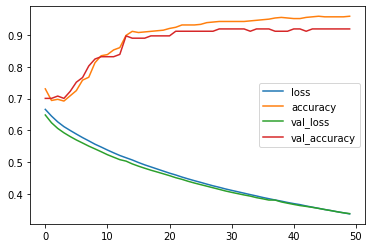

In [37]:
plt.figure(figsize=(12,10))
pd.DataFrame(history.history).plot()


In [38]:
y_pred = fnn.predict(x_test)
y_pred = tf.round(y_pred).numpy()

In [39]:
metrics(y_test,y_pred)

f1 score : 0.9075630252100839

accuracy : 0.9197080291970803

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.95      0.91      0.93        79
    cancerous       0.89      0.93      0.91        58

     accuracy                           0.92       137
    macro avg       0.92      0.92      0.92       137
 weighted avg       0.92      0.92      0.92       137


Confussion matrix--
[[72  7]
 [ 4 54]]

